<a href="https://colab.research.google.com/github/nitinpatil301a/Tensorflow-Keras-Work/blob/master/airline_passengers_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.0.0
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import LSTM, Dropout,Dense
from tensorflow.keras import Sequential
from sklearn.preprocessing import MinMaxScaler

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.0.0`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [2]:
!git clone https://github.com/nitinpatil301a/Tensorflow-Keras-Work.git

Cloning into 'Tensorflow-Keras-Work'...
remote: Enumerating objects: 51, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 51 (delta 18), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (51/51), done.


In [3]:
dataset = pd.read_csv('/content/Tensorflow-Keras-Work/AirPassengers.csv')
dataset.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
dataset = dataset['#Passengers']
dataset = np.array(dataset).reshape(-1,1)
dataset.shape

(144, 1)

In [5]:
dataset

array([[112],
       [118],
       [132],
       [129],
       [121],
       [135],
       [148],
       [148],
       [136],
       [119],
       [104],
       [118],
       [115],
       [126],
       [141],
       [135],
       [125],
       [149],
       [170],
       [170],
       [158],
       [133],
       [114],
       [140],
       [145],
       [150],
       [178],
       [163],
       [172],
       [178],
       [199],
       [199],
       [184],
       [162],
       [146],
       [166],
       [171],
       [180],
       [193],
       [181],
       [183],
       [218],
       [230],
       [242],
       [209],
       [191],
       [172],
       [194],
       [196],
       [196],
       [236],
       [235],
       [229],
       [243],
       [264],
       [272],
       [237],
       [211],
       [180],
       [201],
       [204],
       [188],
       [235],
       [227],
       [234],
       [264],
       [302],
       [293],
       [259],
       [229],
       [203],
      

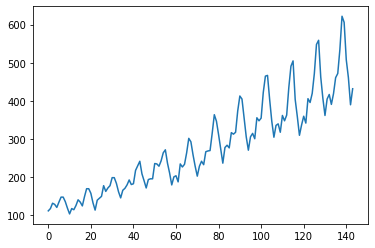

In [6]:
plt.plot(dataset)

In [0]:
scaler = MinMaxScaler()
dataset = scaler.fit_transform(dataset)


In [0]:
train_size = 100
test_size = 44

In [9]:
train = dataset[0:train_size, :]
train.shape

(100, 1)

In [10]:
test = dataset[train_size:144, :]
test.shape

(44, 1)

In [0]:
def get_data(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i+look_back, 0])
    return np.array(dataX), np.array(dataY)

In [0]:
look_back = 1
X_train, y_train = get_data(train, look_back)

In [13]:
X_train

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [14]:
y_train

array([0.02702703, 0.05405405, 0.04826255, 0.03281853, 0.05984556,
       0.08494208, 0.08494208, 0.06177606, 0.02895753, 0.        ,
       0.02702703, 0.02123552, 0.04247104, 0.07142857, 0.05984556,
       0.04054054, 0.08687259, 0.12741313, 0.12741313, 0.1042471 ,
       0.05598456, 0.01930502, 0.06949807, 0.07915058, 0.08880309,
       0.14285714, 0.11389961, 0.13127413, 0.14285714, 0.18339768,
       0.18339768, 0.15444015, 0.11196911, 0.08108108, 0.11969112,
       0.12934363, 0.14671815, 0.17181467, 0.14864865, 0.15250965,
       0.22007722, 0.24324324, 0.26640927, 0.2027027 , 0.16795367,
       0.13127413, 0.17374517, 0.17760618, 0.17760618, 0.25482625,
       0.25289575, 0.24131274, 0.26833977, 0.30888031, 0.32432432,
       0.25675676, 0.20656371, 0.14671815, 0.18725869, 0.19305019,
       0.16216216, 0.25289575, 0.23745174, 0.25096525, 0.30888031,
       0.38223938, 0.36486486, 0.2992278 , 0.24131274, 0.19111969,
       0.24131274, 0.26640927, 0.24903475, 0.31467181, 0.31853

In [0]:
X_test, y_test = get_data(test, look_back)

In [16]:
X_train.shape

(98, 1)

In [0]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [18]:
X_train.shape

(98, 1, 1)

In [0]:
model = Sequential()
model.add(LSTM(10, input_shape = (1, look_back)))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [20]:

model.fit(X_train, y_train, epochs=50, batch_size=1)

Epoch 1/50
98/98 [==============================] - 0s 1ms/step - loss: 0.0432
Epoch 2/50
98/98 [==============================] - 0s 1ms/step - loss: 0.0178
Epoch 3/50
98/98 [==============================] - 0s 1ms/step - loss: 0.0142
Epoch 4/50
98/98 [==============================] - 0s 1ms/step - loss: 0.0124
Epoch 5/50
98/98 [==============================] - 0s 1ms/step - loss: 0.0109
Epoch 6/50
98/98 [==============================] - 0s 1ms/step - loss: 0.0095
Epoch 7/50
98/98 [==============================] - 0s 1ms/step - loss: 0.0082
Epoch 8/50
98/98 [==============================] - 0s 1ms/step - loss: 0.0068
Epoch 9/50
98/98 [==============================] - 0s 2ms/step - loss: 0.0057
Epoch 10/50
98/98 [==============================] - 0s 1ms/step - loss: 0.0046
Epoch 11/50
98/98 [==============================] - 0s 1ms/step - loss: 0.0040
Epoch 12/50
98/98 [==============================] - 0s 1ms/step - loss: 0.0033
Epoch 13/50
98/98 [==============================

In [0]:
y_pred = model.predict(X_test)

In [0]:
y_pred = scaler.inverse_transform(y_pred)

In [0]:

y_test = np.array(y_test)
y_test = y_test.reshape(-1, 1)
y_test = scaler.inverse_transform(y_test)

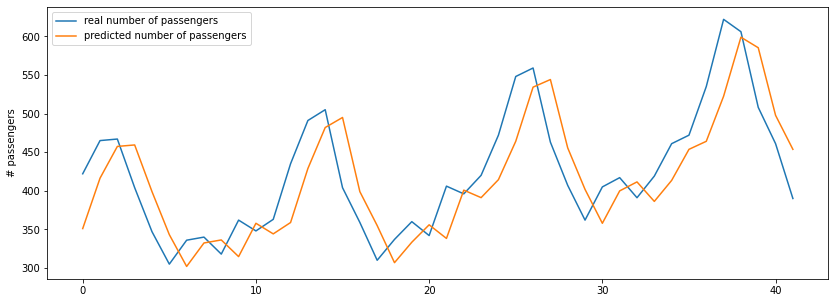

In [24]:
plt.figure(figsize=(14,5))
plt.plot(y_test, label = 'real number of passengers')
plt.plot(y_pred, label = 'predicted number of passengers')
plt.ylabel('# passengers')
plt.legend()
plt.show()